In [ ]:
# Suppress all warnings and messages
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)

# Redirect stdout during imports
import io
import contextlib
import sys

# Define a context manager to suppress stdout and stderr
@contextlib.contextmanager
def suppress_output():
    # Save the original stdout and stderr
    old_stdout = sys.stdout
    old_stderr = sys.stderr
    # Use StringIO to trap the output
    sys.stdout = io.StringIO()
    sys.stderr = io.StringIO()
    try:
        yield  # Execute the code block inside the with statement
    finally:
        # Restore the original stdout and stderr
        sys.stdout = old_stdout
        sys.stderr = old_stderr

# Suppress output during imports
with suppress_output():
    # Regular imports
    import random
    import pandas as pd
    import dowhy
    from dowhy.do_why import CausalModel
    import dowhy.datasets
    from IPython.display import Image, display

# I. Generating dummy data
We generate some dummy data for three variables: X, Y and Z.

z = [i for i in range(10)]
random.shuffle(z)
df = pd.DataFrame(data = {'Z': z, 'X': range(0,10), 'Y': range(0,100,10)})
df

# II. Loading GML graphs
## a. from string

Model to find the causal effect of treatment X on outcome Y


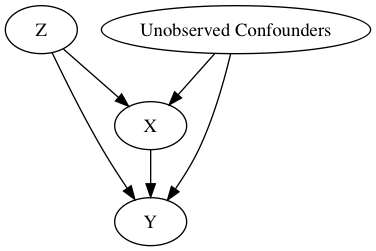

In [9]:
# With GML string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="""graph[directed 1 node[id "Z" label "Z"]  
                    node[id "X" label "X"]
                    node[id "Y" label "Y"]      
                    edge[source "Z" target "X"]    
                    edge[source "Z" target "Y"]     
                    edge[source "X" target "Y"]]"""
                    
        )
model.view_model()
display(Image(filename="causal_model.png"))

## b. from file

Model to find the causal effect of treatment X on outcome Y


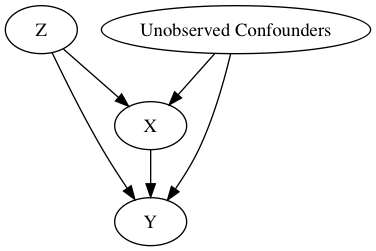

In [ ]:
# With GML file
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="examples/graphs/simple_graph_example.gml"
        )
model.view_model()


display(Image(filename="causal_model.png"))

# III. Loading DOT graphs
## from string

Error: Pygraphviz cannot be loaded. generator raised StopIteration
Trying pydot ...
Model to find the causal effect of treatment X on outcome Y


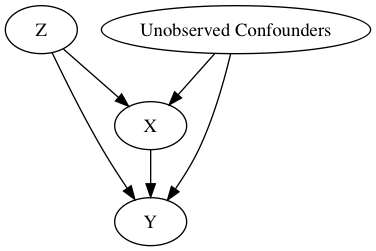

In [19]:
# With DOT string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="digraph {Z -> X;Z -> Y;X -> Y;}"
        )
model.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

## from file

Pygraphviz cannot be loaded. generator raised StopIteration
Trying pydot...
Model to find the causal effect of treatment X on outcome Y


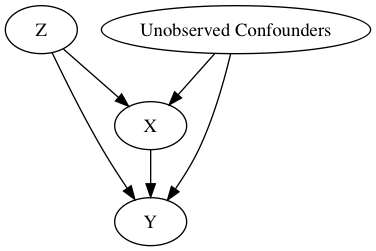

In [ ]:
# With DOT file
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="examples/graphs/simple_graph_example.dot"
        )
model.view_model()


display(Image(filename="causal_model.png"))